loads trained model and selects layer to define art in feature space. 

In [30]:
# Basics
import os
import time
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Image preprocessing stuff
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

# Model stuff
import h5py
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K



In [34]:
#load model

mainpath = '/Users/josephineferrandino/'
os.getcwd()
modelfile = os.getcwd()+"/Desktop/gallery_app/models/VGG_cat.h5"
#modelfile = os.getcwd()+"/models/VGG_classifier_v5.h5

model = load_model(modelfile)

ValueError: Unknown metric function:f1_m

In [8]:
#path to images
imgpath = os.path.join(os.getcwd()+'/Desktop/data/class_art/')
imgfiles = os.listdir(imgpath)
#print(imgfiles)
print(imgpath)


/Users/josephineferrandino/Desktop/data/class_art/


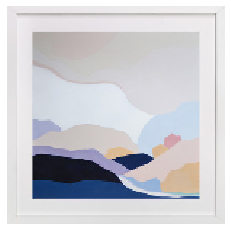

In [9]:
#display image
img_width, img_height = 150, 150
img = image.load_img(imgpath+imgfiles[1180], target_size=(img_width, img_height))
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
#show shape of image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(np.shape(x))

(1, 150, 150, 3)


In [11]:
#get category prediction
prediction = model.predict(x)
prediction = prediction.flatten()

In [12]:
#print category 
categories = np.array(['abstract', 'plant','ABC', 'water','flower', 'architecture'])
#np.where(prediction==max(prediction))[0][0]
print("Looks like:  "+categories[prediction==max(prediction)][0]+" ")

Looks like:  water 


In [34]:
# import matplotlib.pyplot as plt

# allimgspath = mainpath+'Desktop/class_art/'
# allimgs = os.listdir(allimgspath)
# imgfile = allimgspath+allimgs[1251]
# #imgfile = '621318623.jpg'
# img = image.load_img(imgfile, target_size=(150,150))
# plt.imshow(img)
# plt.axis('off')
# plt.show()
# #load image

In [35]:
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# #convert to array

In [13]:
#display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              16779264  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4

In [18]:
#Extract feature layer
layer3 = K.function([model.input],[model.layers[3].output])
print(layer3)

In [ ]:
# def extract_img_features(model,upload_image_path,processedimage):
#     feature_dict = pickle.load(open(mainpath+"/models/VGG_feature_classification_art_full.p","rb"))
#     get_layer = K.function([model.input],[model.layers[3].output])
#     newimgfeature = get_layer([processedimage])[0].flatten()
#     feature_dict[upload_image_path] = newimgfeature
#     return feature_dict

In [14]:
#return processed image
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [15]:
filenames = [imgpath+f for f in imgfiles[:] ]#if f != '.DS_Store']
#[x for x in os.listdir(YOUR_DIR) if x != '.DS_Store']


In [16]:
#import for LSH treatment
from lshash_2.lshash_2 import LSHash
from tqdm import notebook
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
#remove hidden files and get feature array 
start_time = time.time()
#[x for x in os.listdir(YOUR_DIR) if x != '.DS_Store']
feature_dict= {}
feature_dict_no = 0
for f in filenames:
    if f != '/Users/josephineferrandino/Desktop/data/class_art/.DS_Store':
        feature_dict_no+=1
        feature_dict[f] = layer3([preprocess_img(f)])[0].flatten()
    elif f != '/Users/josephineferrandino/Desktop/data/class_art/.DS_Store':
         print(f)

end_time = time.time()
print("Total Time: "+str(end_time - start_time)+" seconds.")

KeyboardInterrupt: 

In [ ]:
#check feature array
feature_dict

In [79]:
# start_time = time.time()
# # #[x for x in os.listdir(YOUR_DIR) if x != '.DS_Store']

# feature_dict_test = {f: layer3([preprocess_img(f)])[0].flatten() for f in filenames[1:10]}

# end_time = time.time()
# print("Total Time: "+str(end_time - start_time)+" seconds.")

Total Time: 1.147695779800415 seconds.


List of feature arrays from different layers to test. Layer 3 was used 

In [26]:
#reran model and extracted layer 6
pickle.dump(feature_dict, open("./VGG_cat_layer6.p", "wb"))

In [40]:
feature_dict = pickle.load(open('./VGG_cat_layer6.p','rb'))

In [33]:
#reran model and extracted layer 3
pickle.dump(feature_dict, open("./VGG_cat_layer3.p", "wb"))

In [20]:
feature_dict = pickle.load(open('./VGG_cat_layer3.p','rb'))

In [18]:
#new with layer 6
pickle.dump(feature_dict, open("./VGG_feature_classification_art_new.p", "wb"))

In [29]:
feature_dict = pickle.load(open('./VGG_feature_classification_art_new.p','rb'))

In [183]:

pickle.dump(feature_dict, open("./VGG_feature_classification_art_full.p", "wb"))

In [49]:
#LSH
# Loading Feature dictionary & associated hashing
feature_dict = pickle.load(open('./VGG_feature_classification_art_full.p','rb'))

In [29]:
feature_dict

{'/Users/josephineferrandino/Desktop/data/class_art/2096art.jpg': array([15.42912  ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.3818273], dtype=float32),
 '/Users/josephineferrandino/Desktop/data/class_art/474art.jpg': array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 2.169885],
       dtype=float32),
 '/Users/josephineferrandino/Desktop/data/class_art/325art.jpg': array([0.17313765, 0.        , 0.        , ..., 0.        , 0.        ,
        5.373953  ], dtype=float32),
 '/Users/josephineferrandino/Desktop/data/class_art/2221art.jpg': array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        5.0105925], dtype=float32),
 '/Users/josephineferrandino/Desktop/data/class_art/192art.jpg': array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 7.861822],
       dtype=float32),
 '/Users/josephineferrandino/Desktop/data/class_art/2570art.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 '/Users/josephineferrandino/Desktop/data

In [301]:
# If you've already run the cell above, only need to load in the pickled lsh & skip the next cell

#lsh = pickle.load(open('./lsh.p','rb'))

In [21]:
# Locality Sensitive Hashing: this calculates the hashings for every feature vector 
# in the feature_dict dictionary
# params
k = 10 # hash size
L = 10  # number of tables
d = len(feature_dict[next(iter(feature_dict))]) # Dimension of Feature vector
# ^^ "next(iter(feature_dict))" - returns the first key of the dictionary. 

lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

# LSH on all the images
for img_path, vec in notebook.tqdm(feature_dict.items()):
    lsh.index(vec, extra_data=img_path)

# Exporting as pickle
pickle.dump(lsh, open('./lsh.p', "wb"))

In [72]:
#get i
def get_similar_item(idx, feature_dict, lsh_variable, n_items=5):
    #IDX =list(feature_dict.keys()).index(idx)
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='cosine')    
    return response

In [107]:
responsetest = get_similar_item(10, feature_dict, lsh, 3)

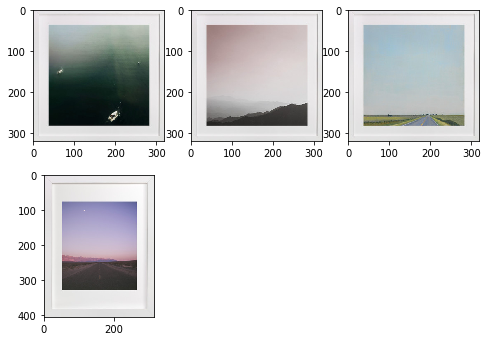

In [108]:
columns = 3
n_items=3
response = responsetest
rows = int(np.ceil(n_items+1/columns))
fig=plt.figure(figsize=(2*rows, 3*rows))
for i in range(1, columns*rows +1):
    if i<n_items+2:
#        print(response[i-1][0][1])
        img = Image.open(response[i-1][0][1])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
plt.show()

<!-- def get_similar_item(upload_image_path, feature_dict, lsh, n_items=3):
    idx =list(feature_dict.keys()).index(upload_image_path)
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='cosine')
    F1 = response[1-1][0][1]
    F2 = response[1-2][0][1]
    F3 = response[1-3][0][1] -->

In [54]:
F = response[0][0][1]

In [55]:
F

'/Users/josephineferrandino/Desktop/data/class_art/1357art.jpg'

In [129]:
response[1-1][0][1]

'/Users/josephineferrandino/Desktop/data/class_art/2470art.jpg'

In [130]:
response[1-2][0][1]

'/Users/josephineferrandino/Desktop/data/class_art/2288art.jpg'

In [131]:
response[1-3][0][1]

'/Users/josephineferrandino/Desktop/data/class_art/403art.jpg'

In [132]:
response[1-4][0][1]

'/Users/josephineferrandino/Desktop/data/class_art/2451art.jpg'

In [156]:
img = Image.open(response[1-3][0][1])

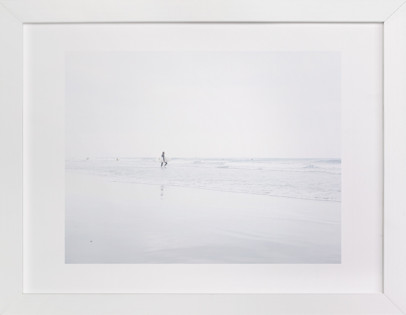

In [157]:
img

responsetest

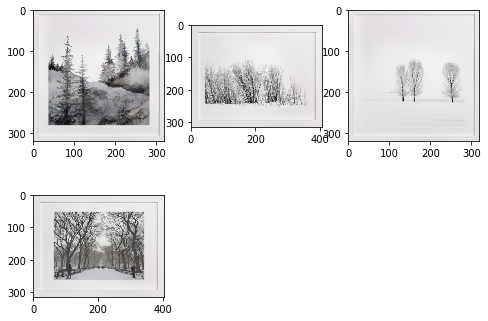

In [95]:
columns = 3
n_items=3
response = responsetest
rows = int(np.ceil(n_items+1/columns))
fig=plt.figure(figsize=(2*rows, 3*rows))
for i in range(1, columns*rows +1):
    if i<n_items+2:
#        print(response[i-1][0][1])
        img = Image.open(response[i-1][0][1])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
plt.show()

In [306]:
print(responsetest)

[(((0.0, 0.0, 0.0, 0.0, 0.0, 3.3640060424804688, 0.0, 0.0, 0.0, 0.0, 9.318490982055664, 0.14302127063274384, 0.0, 0.0, 0.0, 12.133708000183105, 0.0, 0.0, 0.0, 0.0, 0.0, 2.606764554977417, 0.0, 12.184624671936035, 5.850628852844238, 4.3451128005981445, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.063179016113281, 2.922910690307617, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7001123428344727, 5.6543731689453125, 0.0, 1.5189365148544312, 0.0, 0.0, 0.0, 0.0, 9.334716796875, 0.0, 2.503164291381836, 0.0, 0.0, 0.0, 7.25097131729126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.424478530883789, 0.0, 0.0, 1.2299211025238037, 13.325102806091309, 0.0, 0.0, 0.0, 0.0, 8.931802749633789, 7.717390537261963, 5.515904903411865, 0.0, 0.0, 0.0, 0.0, 4.590170860290527, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0294984579086304, 0.0, 2.8992066383361816, 1.0929315090179443, 0.0, 14.30581283569336, 0.0, 2.0871639251708984, 0.0, 0.0, 0.0, 0.0, 0.0, 8.522269248962402, 3.5953450202941895, 0.14155849814414978, 0.9204464554786682, 0.0, 0.0, 0.0, 5.408146

In [173]:
columns = 3
n_items=3
response = responsetest
rows = int(np.ceil(n_items+1/columns))
# fig=plt.figure(figsize=(2*rows, 3*rows))
for i in range(1, columns*rows +1):
     if i<n_items+2:
       print(response[i-1][0][1])
#         img = Image.open(response[i-1][0][1])
#         fig.add_subplot(rows, columns, i)
#         plt.imshow(img)
# plt.show()

TypeError: 'int' object is not callable

In [172]:
rows

4

In [9]:
from lshash_2.lshash_2 import LSHash
from tqdm import notebook
import matplotlib.pyplot as plt
from PIL import Image

In [176]:
columns = 3
n_items=3
rows = int(np.ceil(n_items+1/columns))
fig=plt.figure(figsize=(2*rows, 3*rows))
for i in range(1, columns*rows +1):
    if i<n_items+2:
        #print(response[i-1][0][1])
        img = Image.open(response[i-1][0][1])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

TypeError: 'int' object is not callable

<Figure size 576x864 with 0 Axes>

In [2]:
import pandas as pd
df = pd.read_csv ('final_art_data.csv')

In [3]:
df.head()

,Unnamed: 0,link,image,item,primary,secondary
0,0,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,0art.jpg,[100.58300845 96.91605032 95.89406767],[197.10401507 196.28048072 202.2943055 ]
1,1,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,1art.jpg,[225.1445602 226.55008504 218.19179018],[108.15459484 114.20501057 79.18782443]
2,2,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,2art.jpg,[75.32809315 75.15121379 75.25497766],[210.05448462 208.60022679 209.46384724]
3,3,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,3art.jpg,[79.14591564 79.52899197 55.03092477],[163.90006884 138.62574899 75.65203572]
4,4,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,4art.jpg,[65.38922805 60.71560582 64.85698559],[215.18630929 211.76667 210.59264255]


In [ ]:

In [3]: df.loc[df['item'] == '0art.jpg', 'link']
Out[3]:
2    p3
Name: A, dtype: object

In [4]: df.loc[df['B'] == 3, 'A'].iloc[0]
Out[4]: 'p3'

In [5]:
x = df.loc[df['item'] == '0art.jpg', 'link']

In [6]:
x

0    https://www.minted.com//product/wall-art-print...
Name: link, dtype: object

In [25]:
F

'/Users/josephineferrandino/Desktop/data/class_art/2364art.jpg'

In [1]:
import ntpath
F1 = ntpath.basename(F)

NameError: name 'F' is not defined

In [2]:
x = df.loc[df['item'] == F1, 'link']

NameError: name 'df' is not defined

In [3]:
x

NameError: name 'x' is not defined

In [4]:
F

NameError: name 'F' is not defined

In [44]:
import pandas as pd
df = pd.read_csv('art_new_minted.csv')

In [45]:
import ntpath
F1 = ntpath.basename(F)

In [46]:
x = df.loc[df['item'] == F1, 'link']

In [47]:
x

2364    https://www.minted.com//product/domino-art-pri...
Name: link, dtype: object

In [48]:
print(x)

2364    https://www.minted.com//product/domino-art-pri...
Name: link, dtype: object


In [49]:
df.head()

,Unnamed: 0,link,image,item
0,1,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,0art.jpg
1,2,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,1art.jpg
2,3,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,2art.jpg
3,4,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,3art.jpg
4,5,https://www.minted.com//product/wall-art-print...,http://mintedcdn0.global.ssl.fastly.net/files/...,4art.jpg


In [50]:
import urllib

fun open():
    return urllib.urlopen(x)

SyntaxError: invalid syntax (<ipython-input-50-1f66d2618012>, line 3)

In [51]:
mainpath = '/Users/josephineferrandino/Desktop/gallery_app/'

In [53]:
modelfile = mainpath +'model/VGG_classifier_v5.h5'
model = load_model(modelfile)
CSV = '/Users/josephineferrandino/Desktop/gallery_app/static/data/art_for_app.csv'

OSError: SavedModel file does not exist at: /Users/josephineferrandino/Desktop/gallery_app/model/VGG_classifier_v5.h5/{saved_model.pbtxt|saved_model.pb}

In [86]:
random10 = list(np.array(range(21))*5)
del random10[7]

In [87]:
random10

[0, 5, 10, 15, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

In [88]:
random10[7]

40

In [133]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [134]:

modelfile = "/Users/josephineferrandino/Desktop/gallery_app/models/VGG_classifier_v5.h5"
#global graph
#graph = tf.get_default_graph()
model = load_model(modelfile)

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)             